## SETUP

In [110]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [111]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.13.0


## 데이터셋 적재

In [112]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [113]:
X_train_full.shape

(60000, 28, 28)

In [114]:
X_train_full.dtype

dtype('uint8')

In [115]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

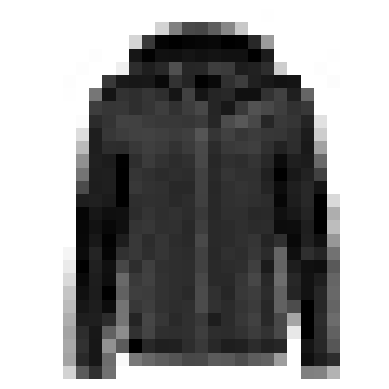

In [116]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [117]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [118]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [119]:
class_names[y_train[0]]

'Coat'

In [120]:
X_valid.shape

(5000, 28, 28)

In [121]:
X_test.shape

(10000, 28, 28)

그림 저장: fashion_mnist_plot


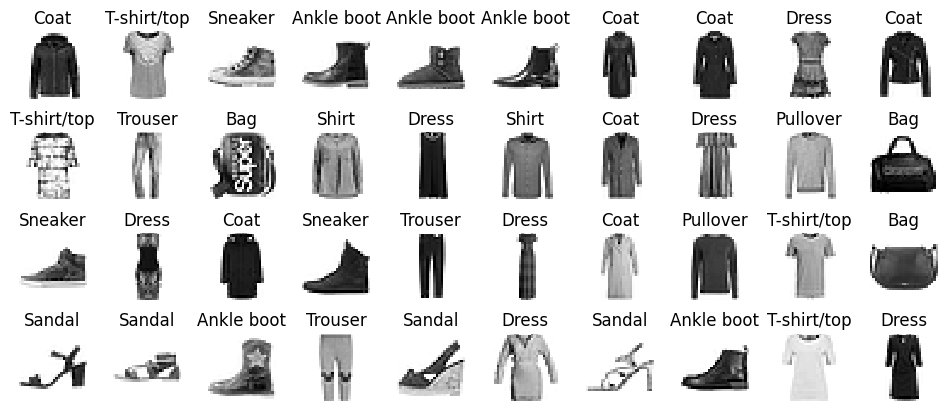

In [122]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

2개의 은닉층으로 이루어진 분류용 다층 퍼셉트론

In [123]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [124]:
model.layers

In [125]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [126]:
# 다른 initialization method
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [127]:
model.layers

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [130]:
hidden1 = model.layers[1]

In [131]:
hidden1.name

'dense'

In [132]:
model.get_layer('dense') is hidden1

True

In [133]:
weights, biases = hidden1.get_weights()

In [134]:
weights

array([[ 6.65977597e-02,  3.61725911e-02, -6.60071820e-02, ...,
        -1.55378282e-02,  1.00955367e-05, -1.72929689e-02],
       [-3.83496135e-02,  2.07231492e-02, -5.42104281e-02, ...,
         3.33101973e-02, -3.35339271e-02, -3.03110108e-02],
       [-2.03340724e-02,  5.04003912e-02, -6.31644949e-02, ...,
        -2.34800950e-02,  1.32982433e-02,  2.17659622e-02],
       ...,
       [-1.58224665e-02, -2.94753164e-03,  5.44492155e-02, ...,
         6.05567694e-02, -1.43221989e-02, -3.40060554e-02],
       [ 6.63286150e-02, -5.04307933e-02, -4.67715263e-02, ...,
        -1.00865215e-02, -1.14440918e-04, -6.83625042e-02],
       [ 3.24603617e-02,  7.34090358e-02, -5.98713011e-03, ...,
        -2.61183865e-02,  3.92965674e-02,  5.82079887e-02]], dtype=float32)

In [135]:
weights.shape

(784, 300)

In [136]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [137]:
biases.shape

(300,)

In [138]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [139]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7167 - accuracy: 0.7636 - val_loss: 0.5243 - val_accuracy: 0.8212
Epoch 2/30
1719/1719 [==============================] - 2s 998us/step - loss: 0.4850 - accuracy: 0.8301 - val_loss: 0.4374 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4402 - accuracy: 0.8451 - val_loss: 0.5310 - val_accuracy: 0.8014
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4142 - accuracy: 0.8558 - val_loss: 0.3924 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3959 - accuracy: 0.8611 - val_loss: 0.3827 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3773 - accuracy: 0.8665 - val_loss: 0.3722 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3654 - accuracy: 0.8700 - val_loss: 0.3731 - val_accurac

In [141]:
history.params
# 훈련 파라미터

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [142]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [143]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [144]:
print(history.history)

{'loss': [0.7167182564735413, 0.4849548637866974, 0.4401925802230835, 0.41420209407806396, 0.39594680070877075, 0.377289354801178, 0.36544281244277954, 0.35430386662483215, 0.34386900067329407, 0.3343501687049866, 0.3267350494861603, 0.31770092248916626, 0.3108031749725342, 0.30436399579048157, 0.2969798743724823, 0.29193729162216187, 0.2861318290233612, 0.2803514003753662, 0.27532440423965454, 0.2701486051082611, 0.26429635286331177, 0.25973382592201233, 0.2556378245353699, 0.2514825165271759, 0.24691376090049744, 0.24229852855205536, 0.2390771508216858, 0.23561561107635498, 0.23100893199443817, 0.22749021649360657], 'accuracy': [0.7635999917984009, 0.8300908803939819, 0.845090925693512, 0.8558181524276733, 0.8610727190971375, 0.86649090051651, 0.8699818253517151, 0.873018205165863, 0.8778363466262817, 0.8798909187316895, 0.883400022983551, 0.8860363364219666, 0.8886908888816833, 0.8896727561950684, 0.8938727378845215, 0.895545482635498, 0.8971818089485168, 0.8985090851783752, 0.90054

그림 저장: keras_learning_curves_plot


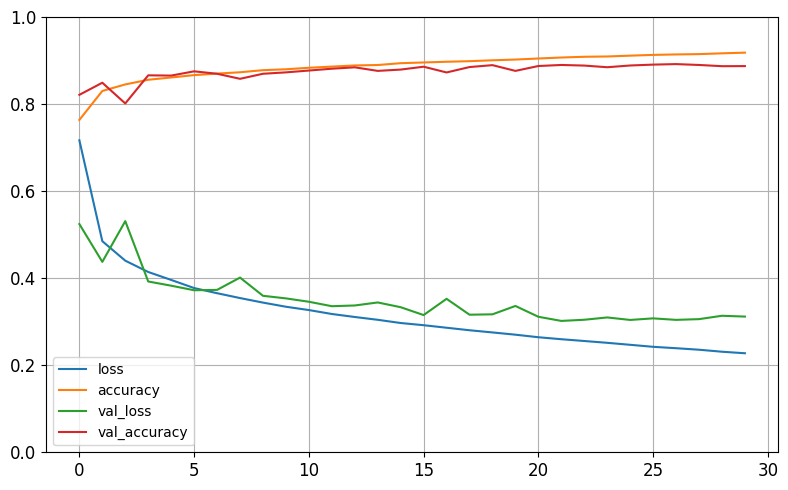

In [145]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show() 

In [146]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 566us/step - loss: 0.3416 - accuracy: 0.8803


[0.3416295051574707, 0.880299985408783]

In [147]:
# 예측 : test 데이터 첫 3개 사용
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 279ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [152]:
# 가장 높은 확률을 가진 클래스만 확인하는 방법
y_pred = np.argmax(model.predict(X_new), axis=-1)

1/1 [==============================] - 0s 13ms/step


In [153]:
y_pred

array([9, 2, 1])

In [154]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [155]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)